## This notebook explores how solar generation aligns with in-home HVAC use and what percent of the HVAC energy load is powered by the home’s rooftop solar over each season for one year
Data from 50 homes has been pre-prepared and is read in from /shared/hvac/summer.csv.gz on the JupyterHub server.

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import sqlalchemy as sqla
import os
from config.read_config import get_database_config
import numpy as np
import sys
%matplotlib inline
sys.executable  # shows you your path to the python you're using

'/opt/conda/bin/python'

In [2]:
#Read pre-processed data for June 2018 through August 2018
summer_df = pd.read_csv('/shared/hvac/summer.csv.gz',compression='gzip')

In [3]:
homes_list = summer_df.dataid.unique() 
len(homes_list)

50

In [3]:
#data analysis for summer

#replace null with 0's 
summer_df = summer_df.fillna(0)

#create new column hvac.
summer_df['hvac'] = summer_df['air1'] + summer_df['air2'] + summer_df['furnace1'] + summer_df['furnace2']

# convert localminute to pandas datetime type
summer_df['datetime'] = pd.to_datetime(summer_df['localminute'])

summer_df = summer_df.set_index('datetime')

#create hour column. We will be calculating average hourly load for summer.
summer_df['hr'] = summer_df.index.hour

#create new dataframes with only solar, hvac and hour column
summer_df_new = pd.DataFrame(summer_df, columns = ['solar', 'hvac','hr'])

#group data based on hour and take avg
summer_df_grouped = summer_df_new.groupby(['hr']).mean()
plot_summer = summer_df_grouped.reset_index()



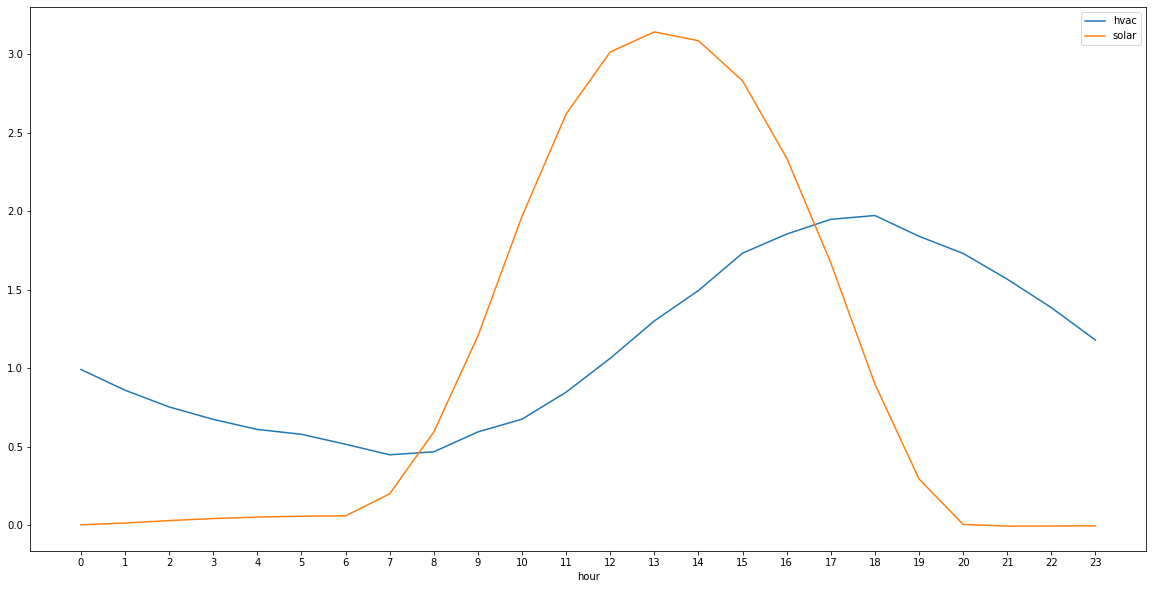

In [4]:
#plot summer
plt.figure(figsize=(20,10))
plt.plot(plot_summer['hr'],plot_summer['hvac'],label="hvac")
plt.plot(plot_summer['hr'],plot_summer['solar'],label="solar")
plt.xticks(np.arange(0, 24, 1.0))
plt.xlabel('hour')
plt.legend()

plt.show()

In [5]:
#Total hvac usage powered by solar in summer
total_hvac_summer = summer_df_new['hvac'].sum()
solar_hvac_summer = summer_df_new.loc[summer_df_new['hvac'] < summer_df_new['solar'], 'hvac'].sum()

hvac_powered_by_solar_summer = (solar_hvac_summer/total_hvac_summer)*100
hvac_powered_by_solar_summer

18.465043169216553

From above results we can see that 18% of HVAC energy load in summer is powered by the home’s rooftop solar.

In [6]:
#Read pre-processed data for Sep 2018 through Nov 2018
fall_df = pd.read_csv('/shared/hvac/fall.csv.gz',compression='gzip')

In [7]:
#data analysis for fall

#replace null with 0's 
fall_df = fall_df.fillna(0)

#create new column hvac.
fall_df['hvac'] = fall_df['air1'] + fall_df['air2'] + fall_df['furnace1'] + fall_df['furnace2']

# convert localminute to pandas datetime type
fall_df['datetime'] = pd.to_datetime(fall_df['localminute'])

fall_df = fall_df.set_index('datetime')

#create hour column. We will be calculating average hourly load for fall.
fall_df['hr'] = fall_df.index.hour

#create new dataframes with only solar, hvac and hour column
fall_df_new = pd.DataFrame(fall_df, columns = ['solar', 'hvac','hr'])

#group data based on hour and take avg
fall_df_grouped = fall_df_new.groupby(['hr']).mean()
plot_fall = fall_df_grouped.reset_index()




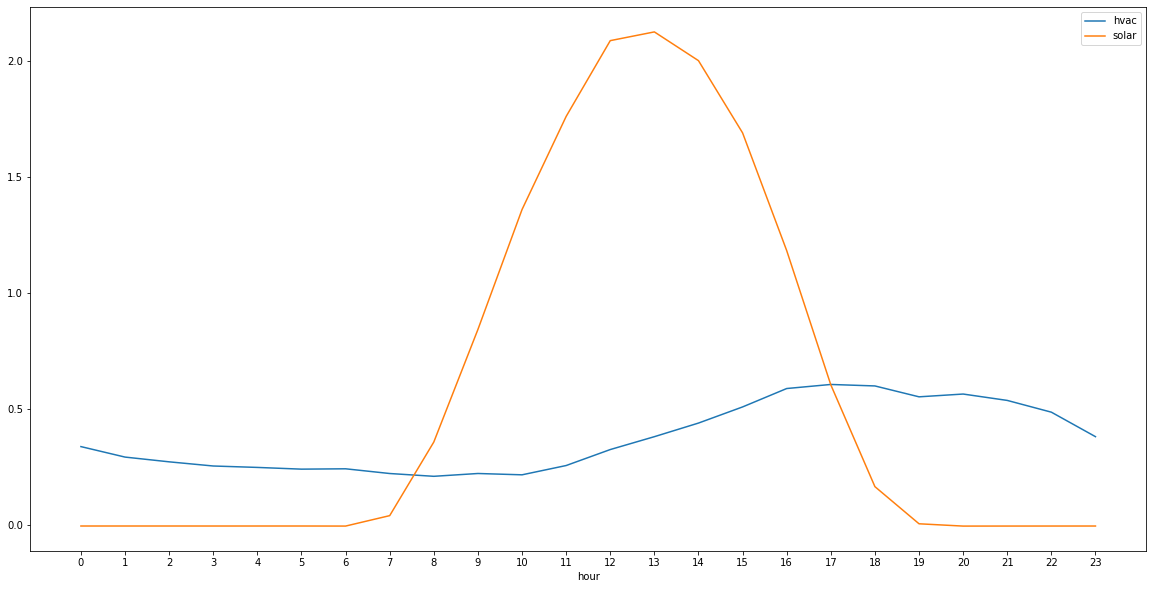

In [8]:
#plot fall
plt.figure(figsize=(20,10))
plt.plot(plot_fall['hr'],plot_fall['hvac'],label="hvac")
plt.plot(plot_fall['hr'],plot_fall['solar'],label="solar")
plt.xticks(np.arange(0, 24, 1.0))
plt.xlabel('hour')
plt.legend()

plt.show()


In [9]:
#Total hvac usage powered by PV system in fall
total_hvac_fall = fall_df_new['hvac'].sum()
solar_hvac_fall = fall_df_new.loc[fall_df_new['hvac'] < fall_df_new['solar'], 'hvac'].sum()

hvac_powered_by_solar_fall = (solar_hvac_fall/total_hvac_fall)*100
hvac_powered_by_solar_fall

14.329629272310662

14% of HVAC energy load in Fall is powered by the home’s rooftop solar.

In [10]:
#Read pre-processed data for march 2018 through may 2018
spring_df = pd.read_csv('/shared/hvac/spring.csv.gz',compression='gzip')

In [11]:
#data analysis for spring

#replace null with 0's 
spring_df = spring_df.fillna(0)

#create new column hvac.
spring_df['hvac'] = spring_df['air1'] + spring_df['air2'] + spring_df['furnace1'] + spring_df['furnace2']

# convert localminute to pandas datetime type
spring_df['datetime'] = pd.to_datetime(spring_df['localminute'])

spring_df = spring_df.set_index('datetime')

#create hour column. We will be calculating average hourly load for spring.
spring_df['hr'] = spring_df.index.hour

#create new dataframes with only solar, hvac and hour column
spring_df_new = pd.DataFrame(spring_df, columns = ['solar', 'hvac','hr'])

#group data based on hour and take avg
spring_df_grouped = spring_df_new.groupby(['hr']).mean()
plot_spring = spring_df_grouped.reset_index()

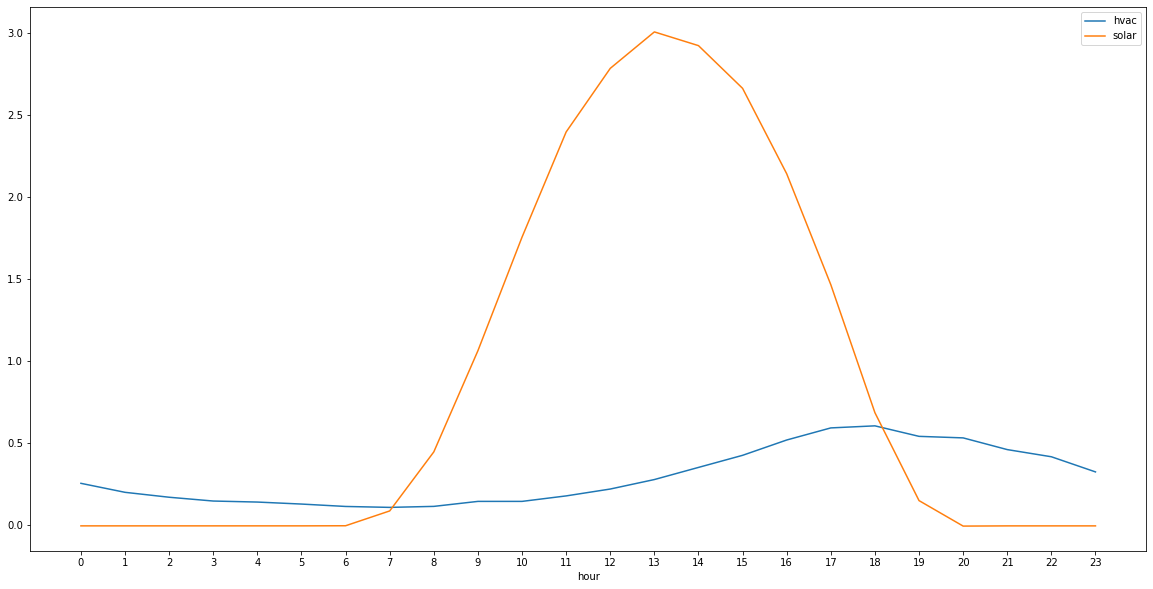

In [12]:
#plot spring
plt.figure(figsize=(20,10))
plt.plot(plot_spring['hr'],plot_spring['hvac'],label="hvac")
plt.plot(plot_spring['hr'],plot_spring['solar'],label="solar")
plt.xticks(np.arange(0, 24, 1.0))
plt.xlabel('hour')
plt.legend()

plt.show()

In [13]:
#Total hvac usage powered by PV system in spring
total_hvac_spring = spring_df_new['hvac'].sum()
solar_hvac_spring = spring_df_new.loc[spring_df_new['hvac'] < spring_df_new['solar'], 'hvac'].sum()

hvac_powered_by_solar_spring = (solar_hvac_spring/total_hvac_spring)*100
hvac_powered_by_solar_spring

21.69577812321789

21% of HVAC energy load in spring is powered by the home’s rooftop solar. 
This is also the highest among all four seasons.

In [14]:
#Read pre-processed data for dec 2018 through feb 2019
winter_df = pd.read_csv('/shared/hvac/winter.csv.gz',compression='gzip')

In [15]:
#data analysis for winter

#replace null with 0's 
winter_df = winter_df.fillna(0)

#create new column hvac.
winter_df['hvac'] = winter_df['air1'] + winter_df['air2'] + winter_df['furnace1'] + winter_df['furnace2']

# convert localminute to pandas datetime type
winter_df['datetime'] = pd.to_datetime(winter_df['localminute'])

winter_df = winter_df.set_index('datetime')

#create hour column. We will be calculating average hourly load for winter.
winter_df['hr'] = winter_df.index.hour

#create new dataframes with only solar, hvac and hour column
winter_df_new = pd.DataFrame(winter_df, columns = ['solar', 'hvac','hr'])

#group data based on hour and take avg
winter_df_grouped = winter_df_new.groupby(['hr']).mean()
plot_winter = winter_df_grouped.reset_index()

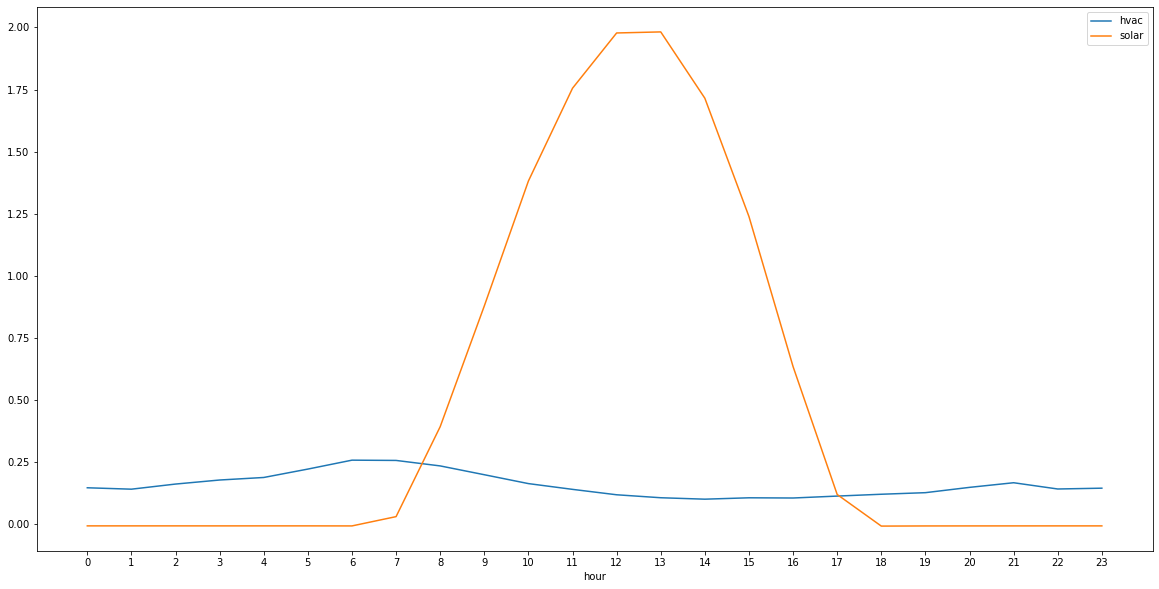

In [16]:
#plot winter
plt.figure(figsize=(20,10))
plt.plot(plot_winter['hr'],plot_winter['hvac'],label="hvac")
plt.plot(plot_winter['hr'],plot_winter['solar'],label="solar")
plt.xticks(np.arange(0, 24, 1.0))
plt.xlabel('hour')
plt.legend()

plt.show()

In [17]:
#Total hvac usage pwered by PV system in winter
total_hvac_winter = winter_df_new['hvac'].sum()
solar_hvac_winter = winter_df_new.loc[winter_df_new['hvac'] < winter_df_new['solar'], 'hvac'].sum()

hvac_powered_by_solar_winter = (solar_hvac_winter/total_hvac_winter)*100
hvac_powered_by_solar_winter

11.05044634638556

From above season charts we can see that solar and home's HVAC usage peaks at different times except in winter. 

Solar peaks between 12PM-14PM while HVAC usage increases until 7PM and then starts to drop off. 

In winter average HVAC usage is almost constant with respect to solar generation.


Also, Spring is the season when HVAC load is most powered by home’s PV system. 
This makes sense because during spring we get enough sunlight but HVAC system are not used as much.